### Machine Learning (IT4060) – Assignment 2
# Heart Attack Risk Prediction Random Forest Classifier
----------------------------------------------------------------------
**Team  Members**
1. Name : **Pathirana K.P.A.K.**<br/>
Student IT No : **IT18148046**<br/>
Email : **it18148046@my.sliit.lk**<br/><br/>
2. Name : **Kariyapperuma.K.A.D.R.L.**<br/>
Student IT No : **IT18121766**<br/>
Email : **it18121766@my.sliit.lk**<br/><br/>
3. Name : **Amarasinghe R.M.G.H**<br/>
Student IT No : **IT18172560**<br/>
Email : **it18172560@my.sliit.lk**<br/><br/>

### Importing Libararies and packages

In [1]:
# Pandas is used for data manipulation
import pandas as pd
# Use numpy to convert to arrays
import numpy as np
# Seaborn statistical data visualization
import seaborn as sb
# Sklearn metrics quantifying the quality of predictions
import sklearn.metrics as sm
# matplotlib use for plotting
import matplotlib.pyplot as plt
%matplotlib inline
# Label encoder use for Encode target labels with value between 0 and n_classes-1.
from sklearn.preprocessing import LabelEncoder
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

### Reading the dataset

In [2]:
# Read in dataset
heart_dataset = pd.read_csv('heart.csv')

In [3]:
# Display dataset
heart_dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Display first 5 rows
heart_dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Shape of the dataset
heart_dataset.shape

(303, 14)

In [6]:
# Columns of the dataset
heart_dataset.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
# Descriptive statistics for each column
heart_dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Data Preprocessing

In [8]:
# Check null values
sum(heart_dataset.isnull().sum())

0

In [9]:
# Check 0 values in age, trtbps, chol, thalachh columns
print((heart_dataset[['age','trtbps','chol','thalachh']]==0).sum())

age         0
trtbps      0
chol        0
thalachh    0
dtype: int64


In [10]:
# Check duplicate values
heart_dataset.duplicated().sum()

1

In [11]:
# Display duplicate values
heart_dataset[heart_dataset.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [12]:
# Delete duplicate values
heart_dataset.drop_duplicates(inplace=True)

In [13]:
# Shape of the dataset after data pre processing
heart_dataset.shape

(302, 14)

### Correlation

<AxesSubplot:>

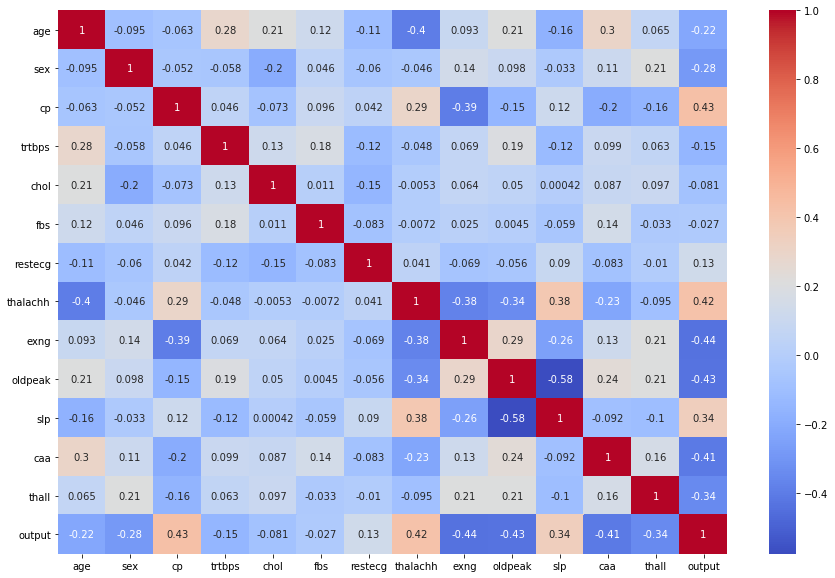

In [14]:
# Display correlation coefficients between variables
plt.figure(figsize=(15,10))
sb.heatmap(heart_dataset.corr(),annot=True,cmap='coolwarm')

### Checking the Distribution of Data

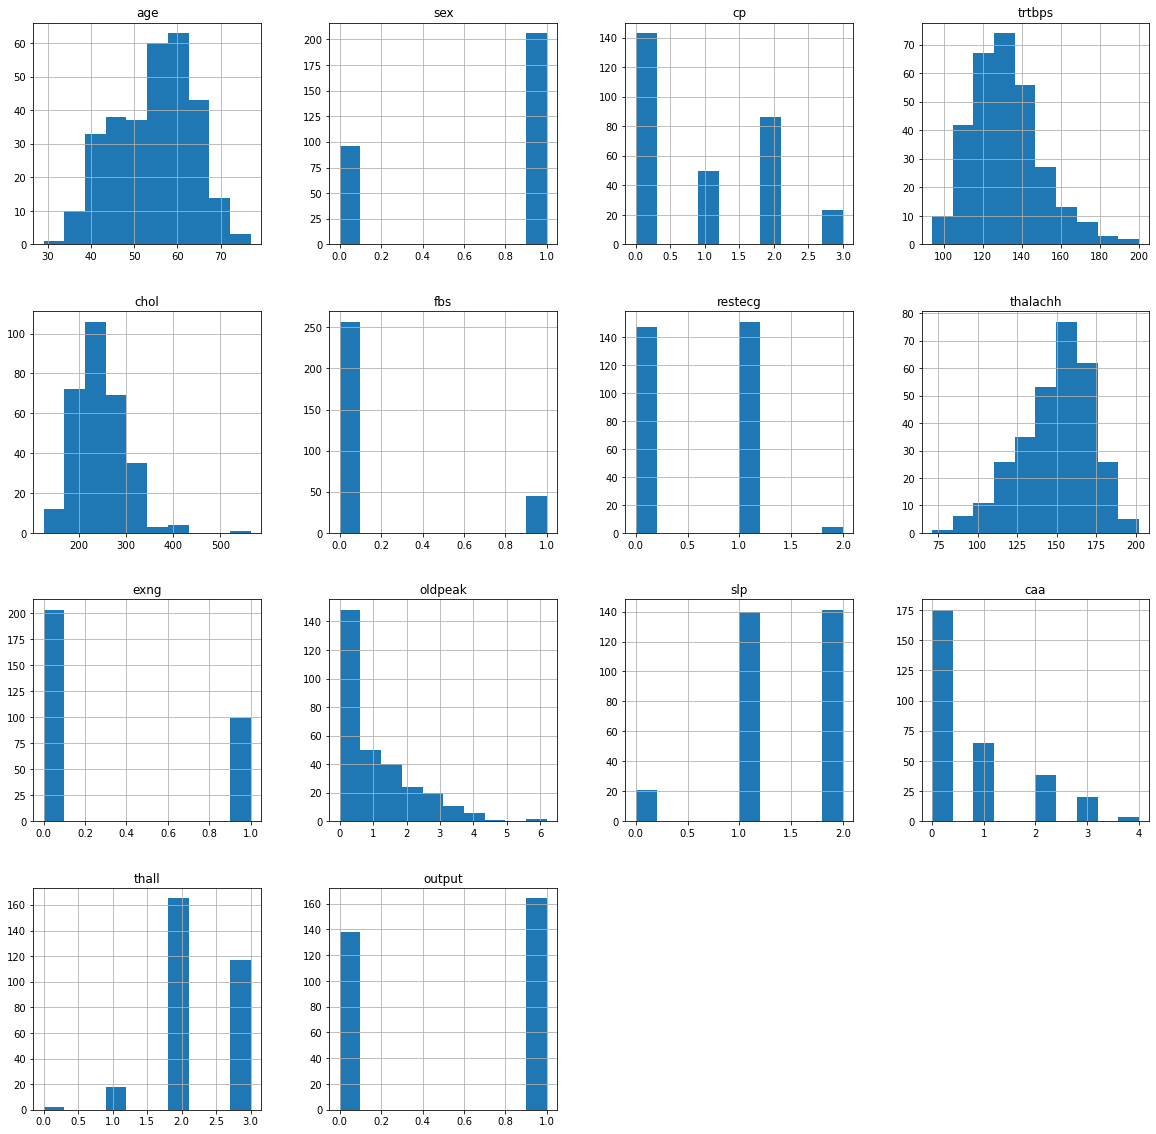

In [15]:
# Display distribution of data
heart_dataset.hist(figsize=(20,20))
plt.show()

Text(0.5, 1.0, 'Prevalence of Heart attack by cp')

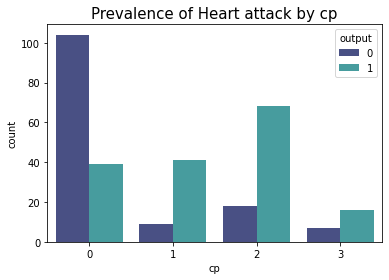

In [16]:
# Plot prevalence of heart attack by cp
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['cp'], palette="mako")
plt.title('Prevalence of Heart attack by cp',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by age')

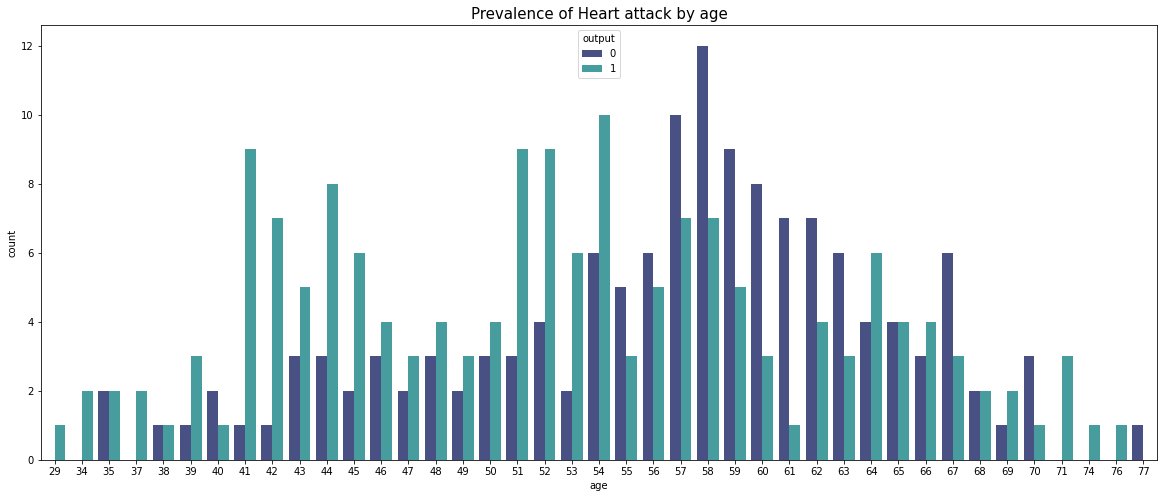

In [17]:
# Plot prevalence of heart attack by age
plt.figure(figsize = (20, 8))
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['age'], palette="mako")
plt.title('Prevalence of Heart attack by age',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by Sex')

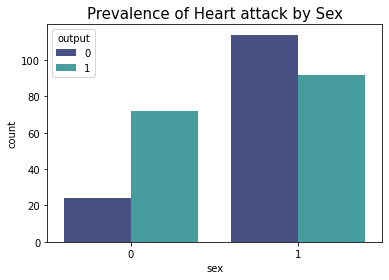

In [18]:
# Plot prevalence of heart attack by sex
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['sex'], palette="mako")
plt.title('Prevalence of Heart attack by Sex',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by trtbps')

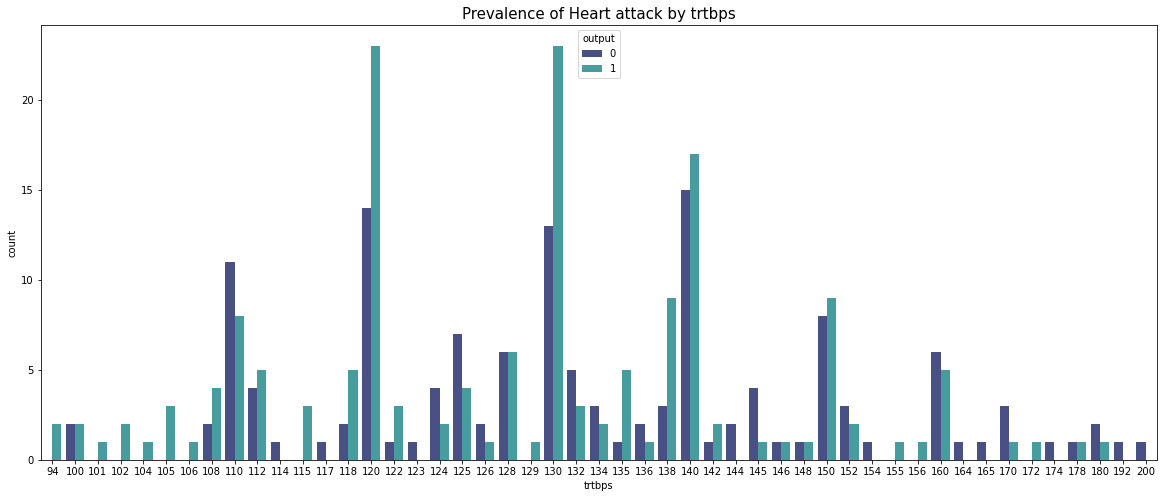

In [19]:
# Plot prevalence of heart attack by trtbps
plt.figure(figsize = (20, 8))
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['trtbps'], palette="mako")
plt.title('Prevalence of Heart attack by trtbps',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by fasting blood sugar > 120 mg/dl')

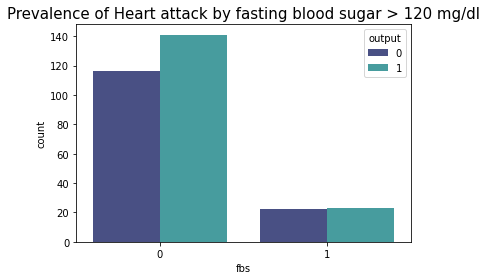

In [20]:
# Plot prevalence of heart attack by fasting blood sugar > 120 mg/dl
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['fbs'], palette="mako")
plt.title('Prevalence of Heart attack by fasting blood sugar > 120 mg/dl',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by restecg')

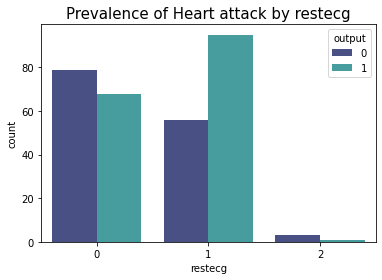

In [21]:
# Plot prevalence of heart attack by restecg
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['restecg'], palette="mako")
plt.title('Prevalence of Heart attack by restecg',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by Exercise induced angina')

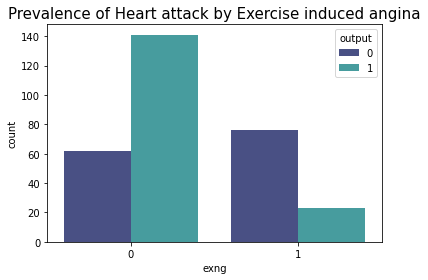

In [22]:
# Plot prevalence of heart attack by exercise induced angina
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['exng'], palette="mako")
plt.title('Prevalence of Heart attack by Exercise induced angina',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by oldpeak')

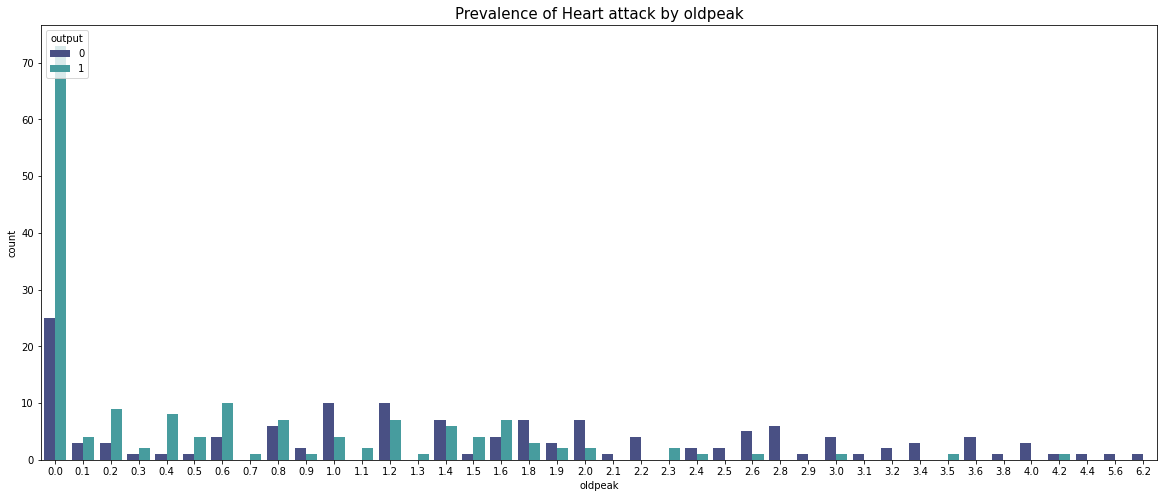

In [23]:
# Plot prevalence of heart attack by oldpeak
plt.figure(figsize = (20, 8))
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['oldpeak'], palette="mako")
plt.title('Prevalence of Heart attack by oldpeak',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by slp')

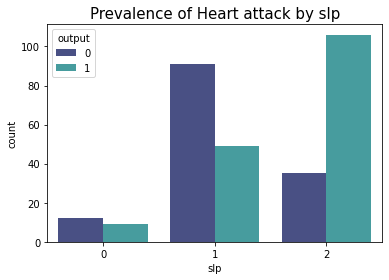

In [24]:
# Plot prevalence of heart attack by slp
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['slp'], palette="mako")
plt.title('Prevalence of Heart attack by slp',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by number of major vessels')

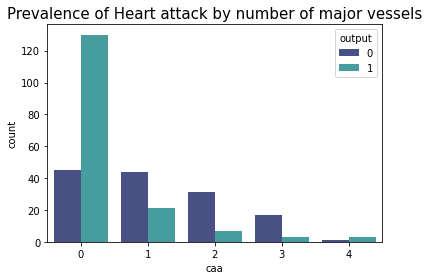

In [25]:
# Plot prevalence of heart attack by number of major vessels
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['caa'], palette="mako")
plt.title('Prevalence of Heart attack by number of major vessels',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by thall')

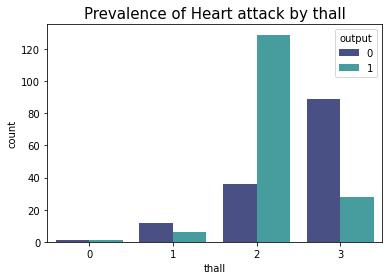

In [26]:
# Plot prevalence of heart attack by thall
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['thall'], palette="mako")
plt.title('Prevalence of Heart attack by thall',fontsize=15)

<AxesSubplot:xlabel='thalachh', ylabel='chol'>

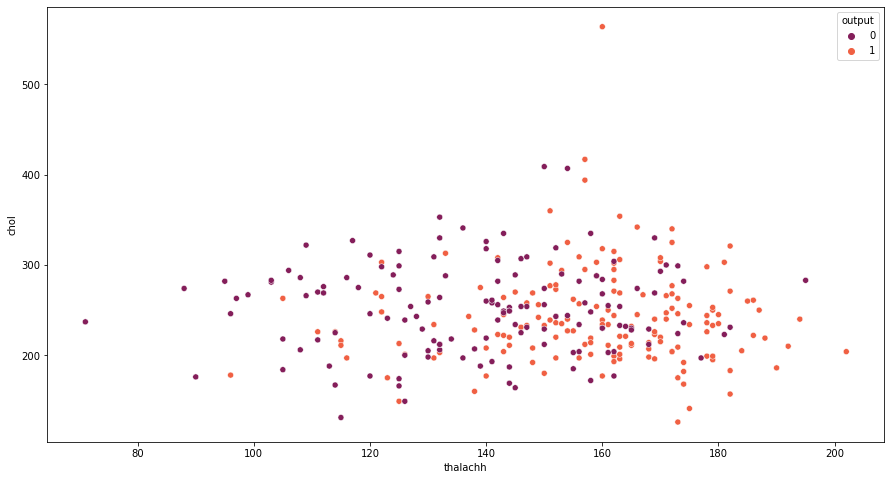

In [27]:
# Plot distribution of chol and thalachh
plt.figure(figsize = (15, 8))
sb.scatterplot(data=heart_dataset,x='thalachh',y='chol' ,hue='output', palette="rocket")

<AxesSubplot:xlabel='age', ylabel='chol'>

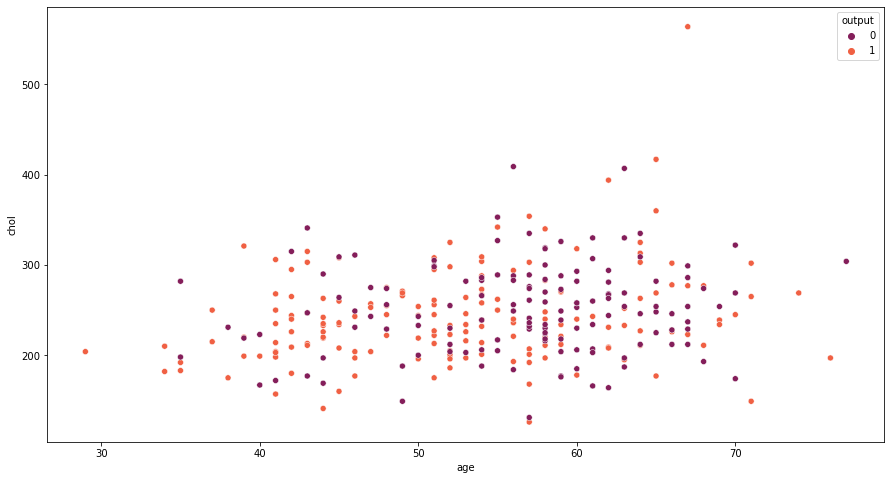

In [28]:
# Plot distribution of chol and age
plt.figure(figsize = (15, 8))
sb.scatterplot(data=heart_dataset,x='age',y='chol' ,hue='output', palette="rocket")

In [29]:
# Encode target labels with value between 0 and n_classes-1
labelencoder = LabelEncoder()
dataTransform = heart_dataset.copy()
for data in heart_dataset.columns:
    dataTransform[data] = labelencoder.fit_transform(heart_dataset[data])

In [30]:
# Display dataTransform
dataTransform

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,29,1,3,31,64,1,0,49,0,22,0,0,1,1
1,3,1,2,22,80,0,1,84,0,32,0,0,2,1
2,7,0,1,22,35,0,0,71,0,14,2,0,2,1
3,22,1,1,14,67,0,1,76,0,8,2,0,2,1
4,23,0,0,14,145,0,1,62,1,6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,23,0,0,28,71,0,1,23,1,2,1,0,3,0
299,11,1,3,8,93,0,1,32,0,12,1,0,3,0
300,34,1,0,30,26,1,1,40,0,31,1,2,3,0
301,23,1,0,22,1,0,1,16,1,12,1,1,3,0


In [31]:
# Remove the labels from the features
X = dataTransform.drop(['output'], axis=1)

In [32]:
# Display features values
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,29,1,3,31,64,1,0,49,0,22,0,0,1
1,3,1,2,22,80,0,1,84,0,32,0,0,2
2,7,0,1,22,35,0,0,71,0,14,2,0,2
3,22,1,1,14,67,0,1,76,0,8,2,0,2
4,23,0,0,14,145,0,1,62,1,6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,23,0,0,28,71,0,1,23,1,2,1,0,3
299,11,1,3,8,93,0,1,32,0,12,1,0,3
300,34,1,0,30,26,1,1,40,0,31,1,2,3
301,23,1,0,22,1,0,1,16,1,12,1,1,3


In [33]:
# Labels are the values we want to predict
Y = dataTransform['output']

In [34]:
# Display label values
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 302, dtype: int64

In [35]:
# Saving feature names for later use
heart_feature_list = list(X.columns)

In [36]:
# Display feature names
heart_feature_list

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall']

In [37]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [38]:
# Display train features values
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
92,18,1,2,27,54,0,1,68,0,0,2,4,2
234,36,1,0,22,135,0,0,11,0,23,1,3,2
24,6,1,3,28,31,0,1,76,1,14,2,0,3
178,9,1,0,14,15,0,0,20,1,24,1,0,3
188,16,1,2,28,64,0,1,62,0,6,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,22,1,1,14,67,0,1,76,0,8,2,0,2
10,20,1,0,28,69,0,1,59,0,12,2,0,2
212,5,1,0,13,50,0,1,39,0,12,1,0,3
189,7,1,0,8,11,0,0,57,0,0,2,0,3


In [39]:
# Display test features values
X_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
23,27,1,2,34,73,1,1,36,1,10,1,0,2
261,18,1,0,9,61,0,1,59,0,0,2,1,2
184,16,1,0,34,73,0,0,28,0,25,1,0,3
229,30,1,2,18,128,0,1,31,1,17,1,0,3
103,8,1,2,14,70,1,1,88,0,8,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,5,0,2,0,31,0,1,77,0,0,2,0,2
117,22,1,3,14,26,0,0,61,0,18,1,0,3
160,22,1,1,14,70,0,1,68,0,0,0,0,2
130,20,0,2,39,33,0,1,62,0,0,2,1,2


In [40]:
# Display train labels
Y_train

92     1
234    0
24     1
178    0
188    0
      ..
3      1
10     1
212    0
189    0
176    0
Name: output, Length: 241, dtype: int64

In [41]:
# Display test labels
Y_test

23     1
261    0
184    0
229    0
103    1
      ..
124    1
117    1
160    1
130    1
277    0
Name: output, Length: 61, dtype: int64

In [42]:
# Display shapes of train and test features and labels
print('The shape of X_train:', X_train.shape)
print('The shape of Y_train:', Y_train.shape)
print('The shape of X_test:', X_test.shape)
print('The shape of Y_test:', Y_test.shape)

The shape of X_train: (241, 13)
The shape of Y_train: (241,)
The shape of X_test: (61, 13)
The shape of Y_test: (61,)


### Prediction Model

In [43]:
# Instantiate model with 1200 decision trees
model = RandomForestClassifier(n_estimators=1200)
# Train the model on training data
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1200)

In [44]:
# Use the forest's predict method on the test data
prediction_y = model.predict(X_test)

In [45]:
# Display predict values
prediction_y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [46]:
# Display accuracy score
experiment_accuracy = sm.accuracy_score(Y_test, prediction_y)
print('Accuracy Score is : ', str(experiment_accuracy))

Accuracy Score is :  0.8688524590163934


In [47]:
# Display classification report
print("Classification Report : ")
print(sm.classification_report(prediction_y,Y_test,target_names=["Heart Attack Risk","No Heart Attack Risk"]))

Classification Report : 
                      precision    recall  f1-score   support

   Heart Attack Risk       0.84      0.76      0.80        21
No Heart Attack Risk       0.88      0.93      0.90        40

            accuracy                           0.87        61
           macro avg       0.86      0.84      0.85        61
        weighted avg       0.87      0.87      0.87        61



Text(89.18, 0.5, 'predicted class axis')

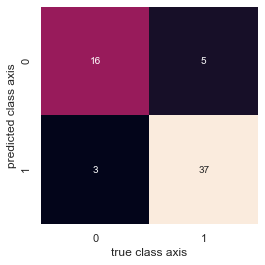

In [48]:
# Display confusion matrix
sb.set()
get_ipython().run_line_magic('matplotlib','inline')
confusionmt = sm.confusion_matrix(Y_test,prediction_y)
sb.heatmap(confusionmt.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true class axis')
plt.ylabel('predicted class axis')

### Prediction for input values

In [49]:
# Input values for prediction
age = 50
sex = 0
cp = 3
trtbps = 110
chol = 264
fbs = 1
restecg = 1
thalachh = 300
exng = 0
oldpeak = 1.2
slp = 1
caa = 0
thall = 3

In [50]:
# Predict heart attack risk using trained model
predict_value = model.predict([[age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall]])
print('Predict Output : ', predict_value)

Predict Output :  [1]
